In [6]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# We add all Plotly and Dash necessary librairies
import plotly.graph_objects as go

import dash
# import dash_daq as daq
from dash.dependencies import Input, Output

In [51]:
X , y = make_regression(n_samples=1000, n_features=4,noise=20)

In [52]:
df = pd.DataFrame(data=X , columns=['X1','X2', 'X3', 'X4'])

df['y'] = y 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

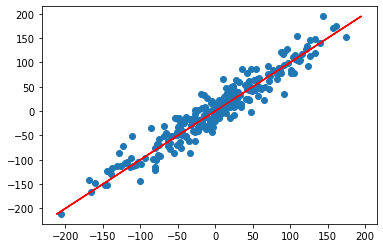

In [61]:
yp = model.predict(X_test)

plt.scatter(yp, y_test)
plt.plot(y_test,y_test,color='red')

In [58]:
model.coef_ , model.intercept_

(array([33.22520368, 40.54188087, 36.18859523, 22.79201321]),
 -0.12597264714278433)

Final ML Model is : **y = 33.22 X1 + 40.5 X2 + 36.18 X3 + 22.8 X4 -0.126**

In [80]:
fig1 = px.scatter(x=y_test, y=yp)

coefdf = pd.DataFrame(data=model.coef_ , index=df.columns[:-1])

fig2 = px.bar(coefdf)

# fig2

In [114]:
app = JupyterDash(__name__)

app.layout = html.Div(style={'textAlign': 'center', 'width': '1200px', 'font-family': 'Verdana',
                            },
                      
                    children=[

                        # Title display
                        html.H1(children="Machine Learning with DASH"),
                        
                        # Dash Graph Component calls the fig_features_importance parameters
                        html.Div(style={'textAlign': 'left', 'width': '1200px'},
                                 
                        children = [html.H4(children="Model Predictions vs Actual"),
                                    dcc.Graph(figure=fig1)]),
                        
                        html.Div(style={'textAlign': 'left', 'width': '1200px'},
                                 
                        children = [html.H4(children="Feature Importance/Weightage"),
                                 dcc.Graph(figure=fig2)]),
                        
                        
                        # We display the most important feature's name
                        html.H4(children=df.columns[0]),
                        
                         dcc.Input(
                                        id="X1", type="number",
                                        debounce=True, placeholder="X1",
                                         value = round(df['X1'].mean(),4)
                                    ),
                        
                        html.H4(children=df.columns[1]),
                        
                         dcc.Input(
                                        id="X2", type="number",
                                        debounce=True, placeholder="X2",
                                         value = round(df['X2'].mean(),4)
                                    ),
                        
                        html.H4(children=df.columns[2]),
                        
                         dcc.Input(
                                        id="X3", type="number",
                                        debounce=True, placeholder="X3",
                                        value = round(df['X3'].mean(),4)
                                    ),
                        
                        html.H4(children=df.columns[3]),
                        
                         dcc.Input(
                                        id="X4", type="number",
                                        debounce=True, placeholder="X4",
                                        value = round(df['X4'].mean(),4)
                                    ),
        
                        
                         
                        html.H2(id="prediction_result"),


                    ])




@app.callback(Output(component_id="prediction_result",component_property="children"),

# The values correspnding to the three sliders are obtained by calling their id and value property
              [Input("X1","value"), Input("X2","value"), Input("X3","value"),Input("X4","value")])

# # # The input variable are set in the same order as the callback Inputs
def update_prediction(X1, X2, X3,X4):

    # We create a NumPy array in the form of the original features
    # ["Pressure","Viscosity","Particles_size", "Temperature","Inlet_flow", "Rotating_Speed","pH","Color_density"]
    # Except for the X1, X2 and X3, all other non-influencing parameters are set to their mean
    input_X = np.array([X1,X2,X3,X4]).reshape(1,-1)        
    
    # Prediction is calculated based on the input_X array
    prediction = model.predict(input_X)[0]
    
    # And retuned to the Output of the callback function
    return "ML Model Prediction: {}".format(round(prediction,4))


if __name__ == "__main__":
    app.run_server()

Dash app running on http://127.0.0.1:8050/
